In [19]:
# load necessary packages and libraries 
import pandas as pd , numpy as np , seaborn as sns , matplotlib.pyplot as plt , scipy.stats as stats
from matplotlib.lines import Line2D
plt.style.use('ggplot')

In [20]:
# load practice data 
data = pd.read_csv(r'C:\Users\user\Downloads\weight-height.csv') # read the csv file

print(data.head()) # print the first 5 rows of the data
data.describe() # print a summary of the data

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


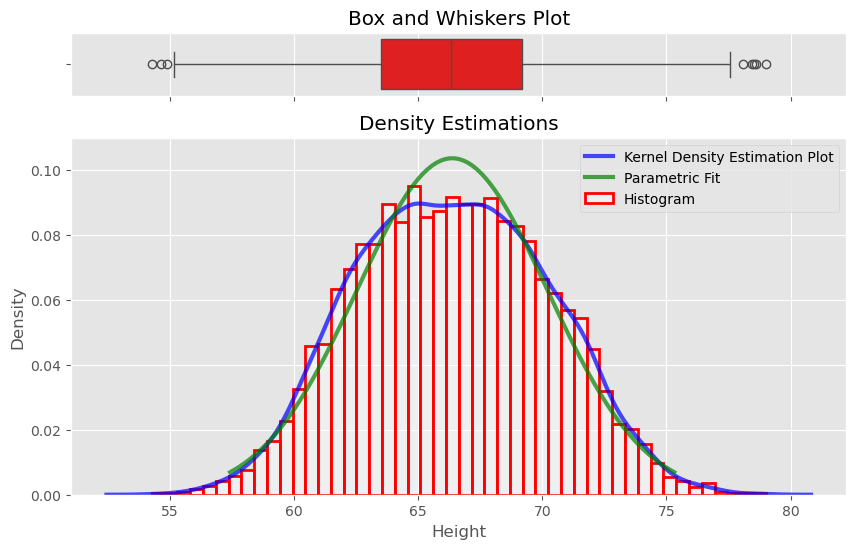

In [21]:
# Create two vertical subplots sharing 15% and 85% of plot space
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [0.15, 0.85]}, figsize = (10, 6)) ## sharex allows sharing of axes i.e. building multiple plots on same axes

# Plot data on the first subplot
sns.histplot(data.Height,
             linewidth=2,
             edgecolor="r",
             alpha=0.4,
             color="w",
             label="Histogram",
             stat="density",
             ax=ax2
             )
# plot the kde plot
sns.kdeplot(data.Height,
            linewidth=3,
            color="b",
            alpha=0.7,
            label="Kernel Density Estimation Plot",
            ax=ax2)

mean = data.Height.mean()
std = data.Height.std()
parametric_dist = stats.norm(loc=mean, scale=std)
x = np.linspace(parametric_dist.ppf(0.01), parametric_dist.ppf(0.99), 100)


ax2.plot(x,
         parametric_dist.pdf(x),
            color="g",
            alpha=0.7,
            linewidth=3,
            label="Parametric Fit")

ax2.set_title('Density Estimations')

sns.boxplot(x=data.Height, ax = ax,color = 'red')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, 0.08))
plt.ylim(0, 0.11)
plt.legend();




In [22]:
# interpolation 
n, bins = np.histogram(data.Height, 20, density=1)
n , bins

(array([0.00040428, 0.00145539, 0.00533644, 0.01228997, 0.02603534,
        0.04883648, 0.07034393, 0.08376588, 0.09031514, 0.08724265,
        0.08958744, 0.08562554, 0.07204189, 0.05829652, 0.0412361 ,
        0.02061805, 0.00970261, 0.00347677, 0.00153625, 0.00040428]),
 array([54.26313333, 55.49991378, 56.73669423, 57.97347468, 59.21025513,
        60.44703559, 61.68381604, 62.92059649, 64.15737694, 65.39415739,
        66.63093784, 67.86771829, 69.10449874, 70.34127919, 71.57805964,
        72.81484009, 74.05162055, 75.288401  , 76.52518145, 77.7619619 ,
        78.99874235]))

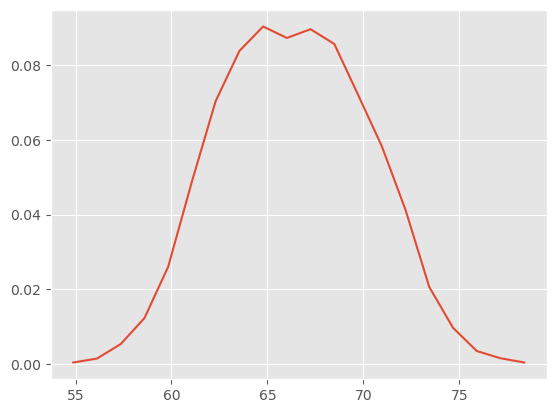

In [23]:
# Initialize numpy arrays according to number of bins with zeros to store interpolated values
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)

# Interpolate through histogram bins 
# identify middle point between two neighboring bins, in terms of x and y coords
for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]

# plot the calculated curve
plt.plot(pdfx, pdfy);

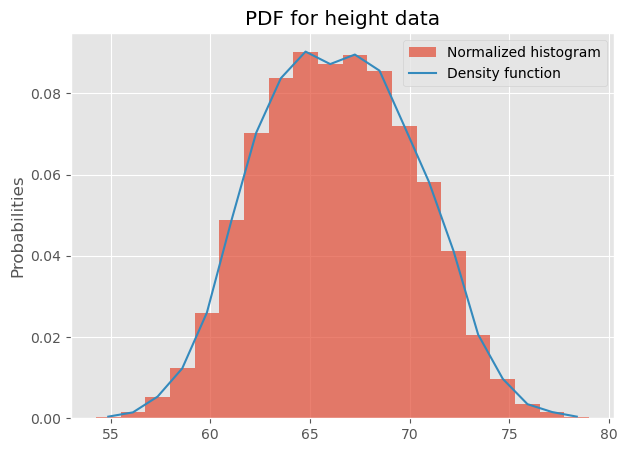

In [24]:
plt.figure(figsize=(7,5))
data.Height.plot.hist(bins = 20, density=True, label = 'Normalized histogram', alpha = 0.7)
# plot the calculated curve
plt.plot(pdfx, pdfy, label = 'Density function')
plt.ylabel ('Probabilities')
plt.legend()
plt.title ('PDF for height data')
plt.show()

In [25]:
# use numpy to generate a random sample 

np.random.seed(123) # for reproducibility
np.random.binomial(100, 0.8)

78

In [26]:
np.random.binomial(100, 0.8)

82

In [27]:
np.random.binomial(100, 0.8)

83

In [28]:
# for loop to confirm that the probability number fluctuates around 80 
iteration = []
for loop in range(500):
    iteration.append(np.random.binomial(100, 0.8))
    np_it = np.array(iteration)


In [29]:
sum(np_it)/500

80.052

In [30]:
n = 10000
iteration = []
for loop in range(n):
    iteration.append(np.random.binomial(3, 0.8))
    np_it = np.array(iteration)

In [31]:
values, counts = np.unique(np_it, return_counts=True)
print(values)
print(counts)

[0 1 2 3]
[  58  929 3946 5067]


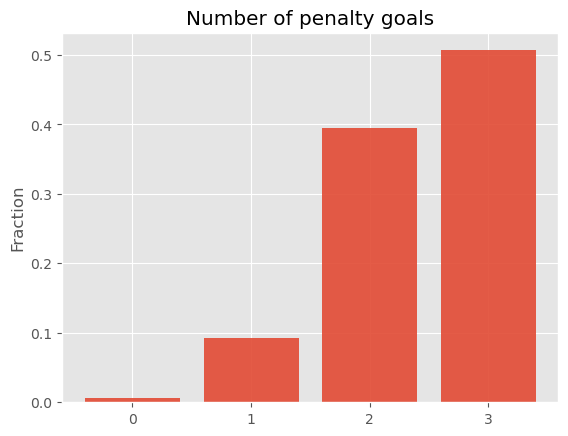

In [32]:
# visualize the results 
plt.bar(values, counts/10000, align='center', alpha=0.9)
plt.xticks(values)
plt.ylabel('Fraction')
plt.title('Number of penalty goals')
plt.show()

In [33]:
counts/10000

array([0.0058, 0.0929, 0.3946, 0.5067])

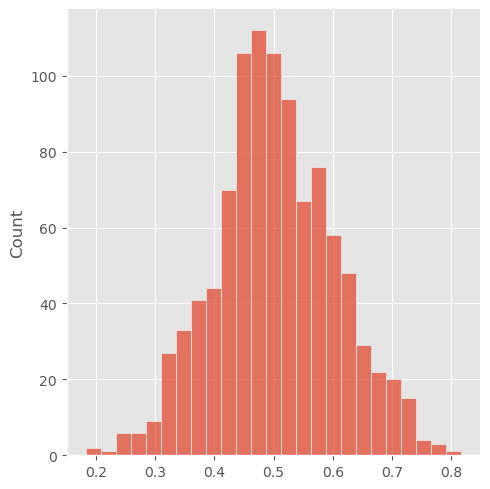

In [34]:
# the normal distribution in python 

mu, sigma = 0.5, 0.1
n = 1000
s = np.random.normal(mu, sigma, n)
sns.displot(s);

In [35]:


def exp_pdf(mu, x):
    decay_rate = 1 / mu
    return decay_rate * np.exp(-decay_rate * x)
    

def exp_cdf(mu, x):
    decay_rate = 1 / mu
    return 1 - np.exp(-decay_rate * x)
    
print("Point probability for exactly 3 minutes: {:.4f}%".format(exp_pdf(4, 3) * 100))
print("Cumulative probability of 3 minutes or less: {:.4f}%".format(exp_cdf(4, 3) * 100))

Point probability for exactly 3 minutes: 11.8092%
Cumulative probability of 3 minutes or less: 52.7633%
